## Prerequisites

In [17]:
##!pip install keras

In [1]:
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


## Load Dataset

In [2]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize

[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

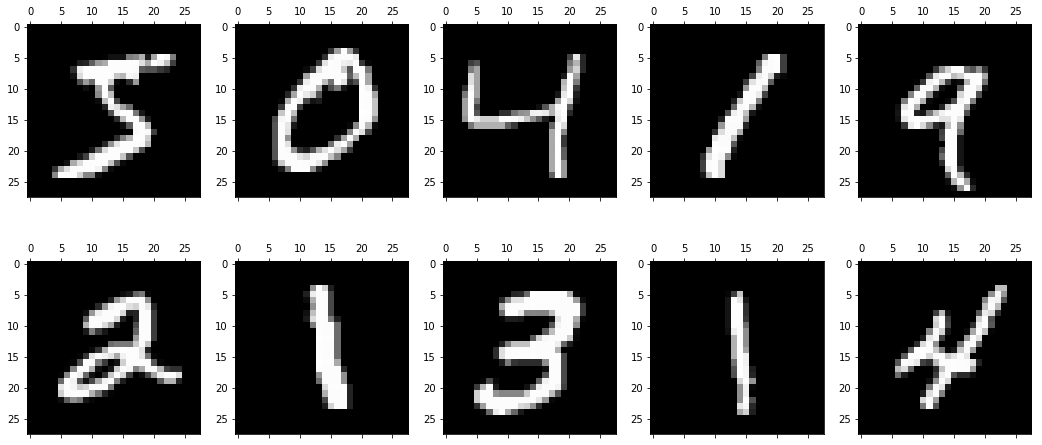

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Single-layer & Multi-layer Neural Network

### Preprocessing

In [4]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [5]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


### Build a Single-layer Neural Network

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=0.0, maxval=0.001),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.00001) ##common lr = 10^-5 * 1
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train,
          y_train_hot,
          epochs=20,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/step - loss: 2.3023 - acc: 0.1573 - val_loss: 2.3017 - val_acc: 0.1486
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 1.7894 - acc: 0.1169 - val_loss: 1.0271 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 1.0253 - acc: 0.1133 - val_loss: 1.0011 - val_acc: 0.1137
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 1.0002 - acc: 0.1159 - val_loss: 0.9847 - val_acc: 0.1172
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.9889 - acc: 0.1194 - val_loss: 0.9928 - val_acc: 0.1192
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.9810 - acc: 0.1221 - val_loss: 0.9814 - val_acc: 0.1302
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.9766 - acc: 0.1259 - val_loss: 0.9772 - val_ac

In [9]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.910400


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


### Build a Multi-layer Neural Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=1000,
                kernel_initializer=RandomUniform(minval=-0.058, maxval=0.058),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=-0.077, maxval=0.077)))

model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.0001) ##common lr 10^-4 * 1 
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
activation_2 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train,
          y_train_hot,
          epochs=30,
#           epochs=100,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 100us/step - loss: 2.1442 - acc: 0.2545 - val_loss: 1.9623 - val_acc: 0.4311
Epoch 2/30
60000/60000 [==============================] - 5s 87us/step - loss: 1.7668 - acc: 0.5587 - val_loss: 1.5478 - val_acc: 0.6612
Epoch 3/30
60000/60000 [==============================] - 5s 78us/step - loss: 1.3648 - acc: 0.7108 - val_loss: 1.1850 - val_acc: 0.7575
Epoch 4/30
60000/60000 [==============================] - 5s 84us/step - loss: 1.0750 - acc: 0.7802 - val_loss: 0.9606 - val_acc: 0.8036
Epoch 5/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.8967 - acc: 0.8172 - val_loss: 0.8222 - val_acc: 0.8283
Epoch 6/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.7814 - acc: 0.8380 - val_loss: 0.7306 - val_acc: 0.8467
Epoch 7/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.7010 - acc: 0.8529 - val_loss: 0.6651 - val_ac

In [13]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.909100


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,4
9,9,9


## Convolutional Neural Network

## Preprocessing

In [14]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Build a Model

### Convolutional Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=6,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5),
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Conv2D(filters=12,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128,
                kernel_initializer='random_uniform',
                activation='sigmoid'))
model.add(Dense(units=10,
                kernel_initializer='random_uniform',
                activation='sigmoid'))

from keras.optimizers import SGD

optimizer = SGD(lr=0.1)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1812      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

In [17]:
model.fit(X_train,
          y_train_hot,
          epochs=10,
#           epochs=30,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 2.3026 - acc: 0.1096 - val_loss: 2.3004 - val_acc: 0.1117
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 2.2511 - acc: 0.1589 - val_loss: 1.5352 - val_acc: 0.5825
Epoch 3/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.4685 - acc: 0.8729 - val_loss: 0.2206 - val_acc: 0.9357
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.1949 - acc: 0.9426 - val_loss: 0.1506 - val_acc: 0.9522
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.1472 - acc: 0.9564 - val_loss: 0.1847 - val_acc: 0.9435
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1235 - acc: 0.9632 - val_loss: 0.0993 - val_acc: 0.9680
Epoch 7/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1061 - acc: 0.9685 - val_loss: 0.0966 -

In [19]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.978200


,actual,predict
9990,7,7
9991,8,8
9992,9,9
9993,0,0
9994,1,1
9995,2,2
9996,3,3
9997,4,4
9998,5,5
9999,6,6


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
